This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 784)

In [4]:
(len(train_images), 784)

(60000, 784)

In [5]:
train_images_with_noise_channels.shape

(60000, 1568)

In [6]:
train_images_with_zeros_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

#model 정의
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#model training
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 7ms/step - loss: 0.6184 - accuracy: 0.8143 - val_loss: 0.2443 - val_accuracy: 0.9266
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2453 - accuracy: 0.9241 - val_loss: 0.1643 - val_accuracy: 0.9513
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1599 - accuracy: 0.9501 - val_loss: 0.1801 - val_accuracy: 0.9457
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1111 - accuracy: 0.9653 - val_loss: 0.1461 - val_accuracy: 0.9562
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0798 - accuracy: 0.9747 - val_loss: 0.1185 - val_accuracy: 0.9663
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0593 - accuracy: 0.9813 - val_loss: 0.1833 - val_accuracy: 0.9496
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0447 - accuracy: 0.9856 - val_loss: 0.1475 - val_accuracy: 0.9606
Epoch 

In [8]:
#noise와 zero가 각각 accuracy에 미치는 영향을 알아보기 위해 original data를 만드는 과정
model = get_model()
history1 = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.2904 - accuracy: 0.9146 - val_loss: 0.1488 - val_accuracy: 0.9573
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1191 - accuracy: 0.9647 - val_loss: 0.1218 - val_accuracy: 0.9632
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0783 - accuracy: 0.9765 - val_loss: 0.0895 - val_accuracy: 0.9732
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0554 - accuracy: 0.9832 - val_loss: 0.0879 - val_accuracy: 0.9753
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0416 - accuracy: 0.9884 - val_loss: 0.0821 - val_accuracy: 0.9756
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0314 - accuracy: 0.9908 - val_loss: 0.0817 - val_accuracy: 0.9785
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0236 - accuracy: 0.9933 - val_loss: 0.0804 - val_accuracy: 0.9787
Epoch 

**Plotting a validation accuracy comparison**

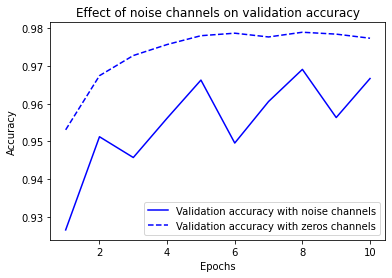

In [9]:
#zero를 add하는 것은 accuracy에 큰 차이가 없어 보이지만, noise는 accuracy에 심각한 bad effect를 가져온다 -> noise는 피하자
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

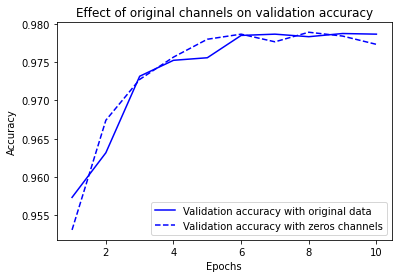

In [10]:
#zero channels는 original data의 accuracy와 큰 차이가 없어보임
import matplotlib.pyplot as plt
val_acc = history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of original channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

#model training 과정 : Deep Learning의 특성 'fit anything'으로 인해 epoch가 진행될 수록 accuracy는 높아지지만, val_accuaracy는 지지부진함 = 오버피팅의 발생
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3163 - accuracy: 0.1031 - val_loss: 2.3058 - val_accuracy: 0.1101
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2997 - accuracy: 0.1148 - val_loss: 2.3090 - val_accuracy: 0.0978
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2883 - accuracy: 0.1286 - val_loss: 2.3249 - val_accuracy: 0.0987
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2742 - accuracy: 0.1420 - val_loss: 2.3314 - val_accuracy: 0.0990
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2556 - accuracy: 0.1577 - val_loss: 2.3409 - val_accuracy: 0.0982
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2331 - accuracy: 0.1700 - val_loss: 2.3594 - val_accuracy: 0.0993
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2075 - accuracy: 0.1851 - val_loss: 2.3735 - val_accuracy: 0.0970

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 970.2356 - accuracy: 0.4388 - val_loss: 2.8595 - val_accuracy: 0.2888
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 3.8925 - accuracy: 0.2847 - val_loss: 3.1043 - val_accuracy: 0.2874
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 3.4136 - accuracy: 0.2939 - val_loss: 2.2238 - val_accuracy: 0.3214
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8482 - accuracy: 0.2948 - val_loss: 2.2867 - val_accuracy: 0.3192
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 3.6308 - accuracy: 0.3201 - val_loss: 7.4108 - val_accuracy: 0.2652
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8287 - accuracy: 0.2901 - val_loss: 2.7533 - val_accuracy: 0.2838
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.6610 - accuracy: 0.3158 - val_loss: 2.4277 - val_accuracy: 0.3241
Epoc

**The same model with a more appropriate learning rate**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3527 - accuracy: 0.9125 - val_loss: 0.1955 - val_accuracy: 0.9479
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1349 - accuracy: 0.9640 - val_loss: 0.1761 - val_accuracy: 0.9578
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1135 - accuracy: 0.9732 - val_loss: 0.1415 - val_accuracy: 0.9743
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0961 - accuracy: 0.9787 - val_loss: 0.1879 - val_accuracy: 0.9703
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0854 - accuracy: 0.9818 - val_loss: 0.1651 - val_accuracy: 0.9738
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0771 - accuracy: 0.9840 - val_loss: 0.2763 - val_accuracy: 0.9698
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0674 - accuracy: 0.9864 - val_loss: 0.2946 - val_accuracy: 0.9655
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [14]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6688 - accuracy: 0.8368 - val_loss: 0.3573 - val_accuracy: 0.9026
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3516 - accuracy: 0.9027 - val_loss: 0.3070 - val_accuracy: 0.9153
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.9124 - val_loss: 0.2922 - val_accuracy: 0.9190
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2992 - accuracy: 0.9158 - val_loss: 0.2807 - val_accuracy: 0.9225
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2896 - accuracy: 0.9192 - val_loss: 0.2753 - val_accuracy: 0.9247
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.9207 - val_loss: 0.2728 - val_accuracy: 0.9248
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2779 - accuracy: 0.9224 - val_loss: 0.2712 - val_accuracy: 0.9267
Epoch 

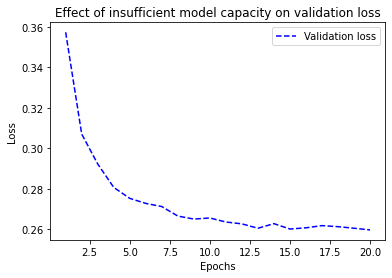

In [15]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [16]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3620 - accuracy: 0.8973 - val_loss: 0.1933 - val_accuracy: 0.9429
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1600 - accuracy: 0.9521 - val_loss: 0.1382 - val_accuracy: 0.9574
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1130 - accuracy: 0.9661 - val_loss: 0.1083 - val_accuracy: 0.9675
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0867 - accuracy: 0.9733 - val_loss: 0.1009 - val_accuracy: 0.9688
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0693 - accuracy: 0.9791 - val_loss: 0.0975 - val_accuracy: 0.9718
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.1022 - val_accuracy: 0.9690
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0853 - val_accuracy: 0.9751
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [17]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 40ms/step - loss: 0.5215 - accuracy: 0.7849 - val_loss: 0.3948 - val_accuracy: 0.8745
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3229 - accuracy: 0.9036 - val_loss: 0.3143 - val_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2376 - accuracy: 0.9267 - val_loss: 0.2844 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1860 - accuracy: 0.9413 - val_loss: 0.2727 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1510 - accuracy: 0.9527 - val_loss: 0.2742 - val_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1253 - accuracy: 0.9624 - val_loss: 0.3018 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1062 - accurac

**Version of the model with lower capacity**

In [18]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6276 - accuracy: 0.7438 - val_loss: 0.5473 - val_accuracy: 0.8421
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4918 - accuracy: 0.8687 - val_loss: 0.4596 - val_accuracy: 0.8610
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4006 - accuracy: 0.8878 - val_loss: 0.3781 - val_accuracy: 0.8702
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3155 - accuracy: 0.9067 - val_loss: 0.3314 - val_accuracy: 0.8834
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2633 - accuracy: 0.9199 - val_loss: 0.3015 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2248 - accuracy: 0.9302 - val_loss: 0.2853 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1953 - accuracy: 0.9386 - val_loss: 0.2778 - val_accuracy: 0.8906
Epoch 8/20
30

**Version of the model with higher capacity**

In [19]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5357 - accuracy: 0.7526 - val_loss: 0.3011 - val_accuracy: 0.8864
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2596 - accuracy: 0.8999 - val_loss: 0.3226 - val_accuracy: 0.8599
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1440 - accuracy: 0.9454 - val_loss: 0.3329 - val_accuracy: 0.8785
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0993 - accuracy: 0.9630 - val_loss: 0.2885 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0169 - accuracy: 0.9972 - val_loss: 0.4744 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1527 - accuracy: 0.9787 - val_loss: 0.4455 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.5176 - val_accuracy: 0.8881
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [20]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6003 - accuracy: 0.7821 - val_loss: 0.4678 - val_accuracy: 0.8731
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4033 - accuracy: 0.8963 - val_loss: 0.4098 - val_accuracy: 0.8712
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3409 - accuracy: 0.9118 - val_loss: 0.3793 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3094 - accuracy: 0.9230 - val_loss: 0.3653 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2894 - accuracy: 0.9321 - val_loss: 0.3607 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2743 - accuracy: 0.9327 - val_loss: 0.3999 - val_accuracy: 0.8694
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2650 - accuracy: 0.9382 - val_loss: 0.3696 - val_accuracy: 0.8834
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [21]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [22]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6228 - accuracy: 0.6442 - val_loss: 0.4730 - val_accuracy: 0.8451
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4971 - accuracy: 0.7673 - val_loss: 0.3939 - val_accuracy: 0.8684
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4157 - accuracy: 0.8297 - val_loss: 0.3202 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3547 - accuracy: 0.8619 - val_loss: 0.2884 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3043 - accuracy: 0.8877 - val_loss: 0.2761 - val_accuracy: 0.8918
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2659 - accuracy: 0.9028 - val_loss: 0.2854 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2338 - accuracy: 0.9181 - val_loss: 0.2810 - val_accuracy: 0.8905
Epoch 8/20
30

## Summary